In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

## First, read in your dataframe

In [2]:
data = pd.read_csv('findings_data.csv')

In [3]:
data.head()

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size
0,1,1,Cardiomegaly|Emphysema,57,M,NaN
1,2,2,No Finding,77,M,NaN
2,3,3,Atelectasis,79,M,NaN
3,4,4,Cardiomegaly|Edema|Effusion,55,F,NaN
4,5,5,Consolidation|Mass,68,M,2516.0


### To understand distributions of variables as they relate to diseases, let's try splitting up the 'Finding Labels' column into one additional column per disease (e.g. one for 'Cardiomegaly', one for 'Emphysema', etc.) and put a binary flag in that column to indicate the presence of the disease

In [4]:
all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        data[c_label] = data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
data.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
457,458,458,No Finding,60,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
379,380,380,Pleural_Thickening,72,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
326,327,327,No Finding,49,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


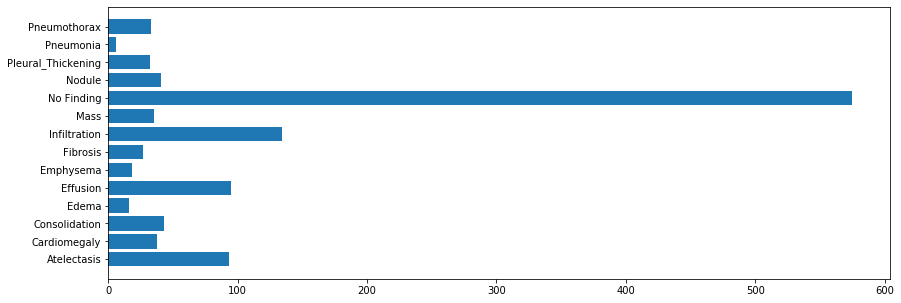

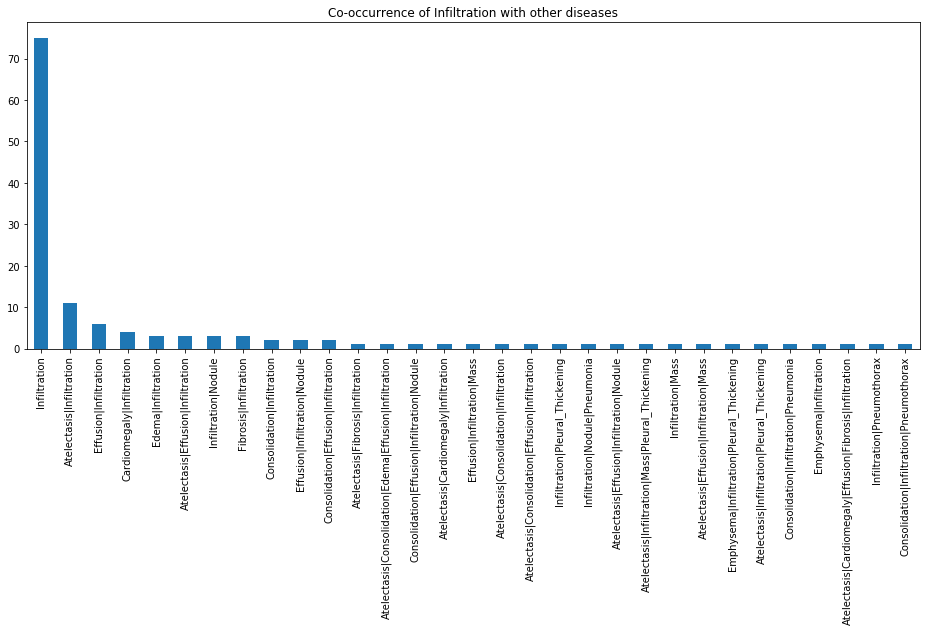

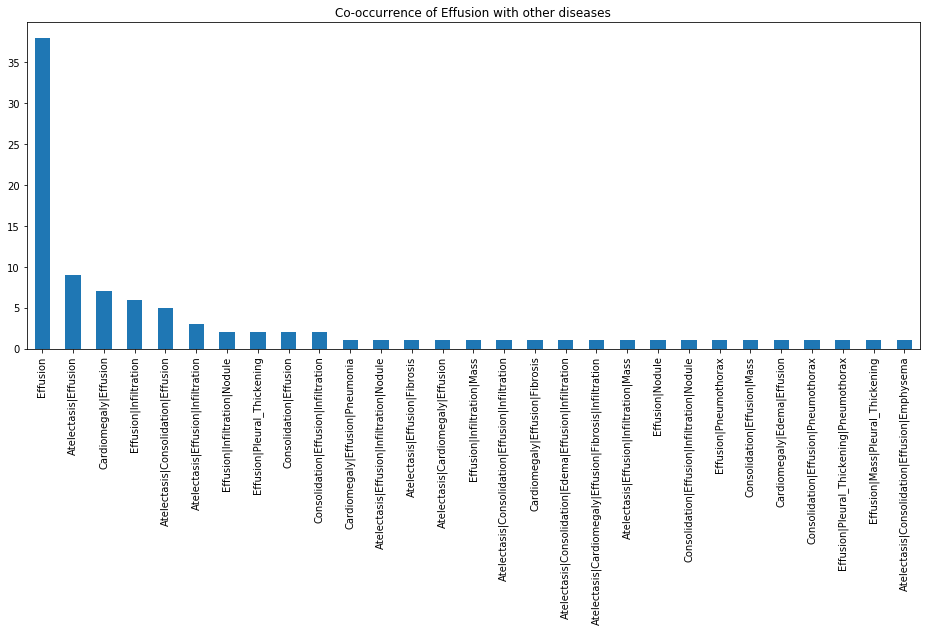

In [110]:
## Now write your code here to visualize some of the distributions specified in the instructions
## How are the different diseases distributed in my dataset in terms of frequency and co-occurrence with one another?
## (For the sake of time, just choose one of the diseases and assess its co-occurrence frequencies with all other diseases.)
plt.figure(figsize=(14,5))
plt.barh(y = data[all_labels].sum().index.tolist(), width = data[all_labels].sum()[0:14])
plt.figure(figsize=(16,6))
data[data.Infiltration==1]['Finding Labels'].value_counts().plot(kind='bar', title = 'Co-occurrence of Infiltration with other diseases')
plt.figure(figsize=(16,6))
data[data.Effusion==1]['Finding Labels'].value_counts().plot(kind='bar', title = 'Co-occurrence of Effusion with other diseases')

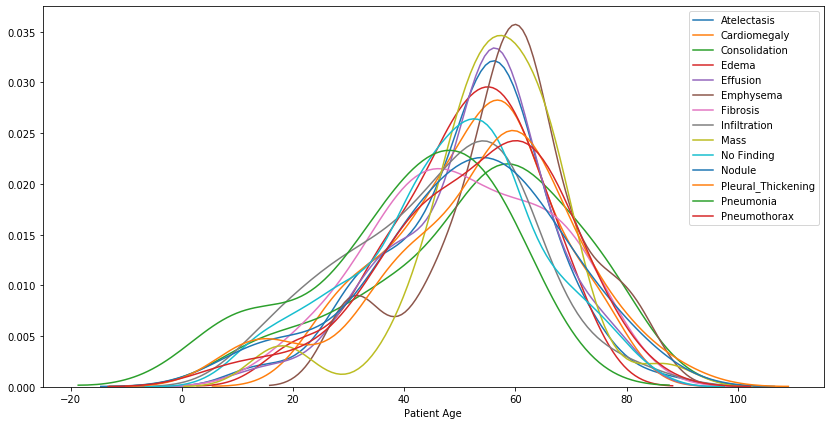

In [231]:
# How is age distributed across my dataset? 
# Is it distributed differently for different diseases?
plt.figure(figsize=(14,7))
for i in all_labels:
    sns.distplot(data.loc[data[i] == 1.0]['Patient Age'], hist = False, label = i)

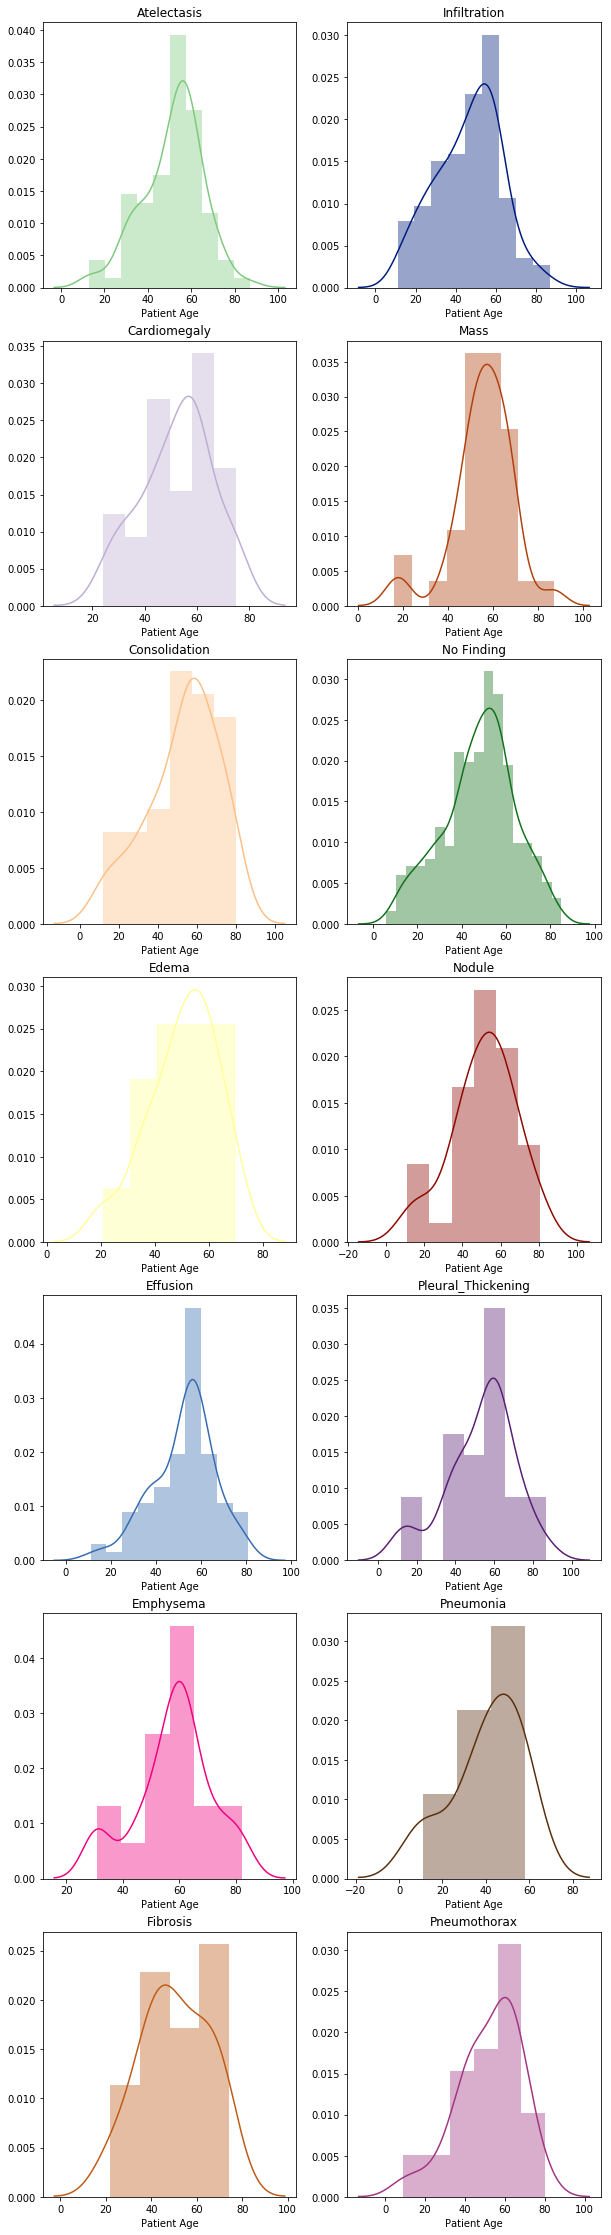

In [228]:
fig, axs = plt.subplots(nrows=7, ncols = 2, figsize=(10, 40))
for index, i in enumerate(all_labels):
    if index <= 6:
        axs[index, 0].set_title(i)
        plot = sns.distplot(data.loc[data[i] == 1.0]['Patient Age'], ax=axs[index][0], color = sns.color_palette('Accent')[index])
    if index > 6:
        axs[index-7, 1].set_title(i)
        plot = sns.distplot(data.loc[data[i] == 1.0]['Patient Age'], ax=axs[index-7][1], color = sns.color_palette('dark')[index - 7])

In [128]:
data.loc[data['Infiltration'] == 1.0].groupby('Patient Gender').sum().transpose()

Patient Gender,F,M
Unnamed: 0,30874.0,34077.0
Patient ID,30874.0,34077.0
Patient Age,2954.0,3248.0
Mass_Size,1980.0,7636.0
Atelectasis,14.0,10.0
Cardiomegaly,0.0,6.0
Consolidation,2.0,8.0
Edema,2.0,2.0
Effusion,10.0,10.0
Emphysema,0.0,2.0


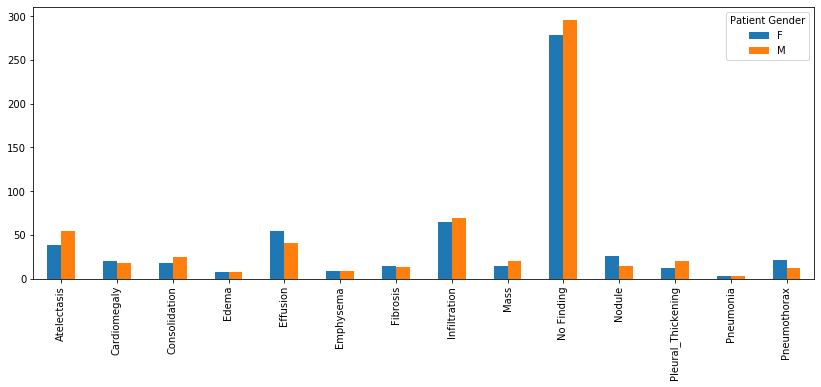

In [148]:
data.groupby('Patient Gender').sum().transpose()[4:].plot(kind='bar', figsize = (14,5))

### Finally, look at if and how age & gender relate to mass size in individuals who have a mass as a finding:

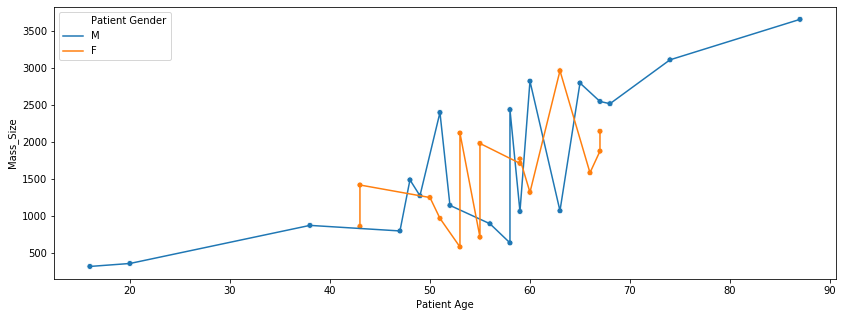

In [160]:
plt.figure(figsize = (14, 5))
sns.scatterplot(x = 'Patient Age', y = 'Mass_Size',hue = 'Patient Gender', legend = False, data = data)
sns.lineplot(x = 'Patient Age', y = 'Mass_Size',hue = 'Patient Gender', estimator = None, data = data)

In [233]:
## see if there are significant correlations between the two:
print(scipy.stats.pearsonr(data[data.Mass_Size.isna() == False]['Mass_Size'],
                     data[data.Mass_Size.isna() == False]['Patient Age']))


mass_sizes_male = data[data.Mass_Size.isna() == False][data['Patient Gender'] == 'M']['Mass_Size'].tolist()
mass_sizes_female = data[data.Mass_Size.isna() == False][data['Patient Gender'] == 'F']['Mass_Size'].tolist()
print(scipy.stats.ttest_ind(mass_sizes_male, mass_sizes_female))

(0.7275663300043573, 7.354553889321924e-07)
Ttest_indResult(statistic=0.6188395721019645, pvalue=0.5402707532656863)


C:\Users\abhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\abhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
